## Mock data generation using FRB redshift distribution function

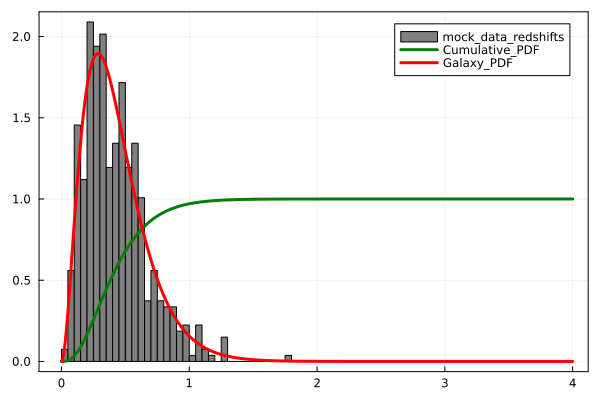

In [5]:
using Interpolations,CSV,DataFrames,Plots,Statistics

# galaxy distribution function
function galaxy_distribution(z; α = 7)
    return z^2 * exp(-α * z)*(7^3/2)
end

# Take integration of above distribution function to get Cumulative distribution function
# interpolation of data using Cumulative probability distribution function(cpdf)
function cpdf_galaxy_distribution(z; α = 7)
    return 1-exp(-α*z)*((α*z)^2+2*α*z+2)/2
end

z_data = collect(0:0.01:4)
galxy_pdf = galaxy_distribution.(z_data)
cpdf_data = cpdf_galaxy_distribution.(z_data)

chimefrbs_data = CSV.read("chimefrbcat.csv", DataFrame)
N = length(chimefrbs_data[:, 1])
redshift_mock_data = zeros(N)
for i in 1:N
    interp_linear = LinearInterpolation(cpdf_data, z_data)
    redshift_mock_data[i] = interp_linear(rand())
end

# Writing mock data to new CSV file
chimefrbs_data.redshift = redshift_mock_data
CSV.write("chimefrbcat_mock.csv", chimefrbs_data)
chimefrbs_mock_data = CSV.read("chimefrbcat_mock.csv", DataFrame)
plot(framestyle=:box)
histogram!(chimefrbs_mock_data.redshift,c = :gray,label = "mock_data_redshifts", normalize=:pdf, bins = 50)
plot!(z_data, cpdf_data, label = "Cumulative_PDF",lw=3,c=:green)
plot!(z_data, galxy_pdf, label = "Galaxy_PDF",lw=3,c=:red)


